In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist if "Gothic" in font.name]
print(font_list)


['Franklin Gothic Heavy', 'HYGothic-Extra', 'HYGothic-Extra', 'Franklin Gothic Medium', 'Century Gothic', 'Malgun Gothic', 'HYGothic-Medium', 'Yu Gothic', 'Franklin Gothic Medium Cond', 'Showcard Gothic', 'Copperplate Gothic Light', 'Franklin Gothic Demi Cond', 'Franklin Gothic Book', 'Franklin Gothic Demi Cond', 'Yu Gothic', 'Franklin Gothic Demi', 'Copperplate Gothic Bold', 'Franklin Gothic Heavy', 'Franklin Gothic Heavy', 'Malgun Gothic', 'Century Gothic', 'Malgun Gothic', 'Showcard Gothic', 'Century Gothic', 'Franklin Gothic Book', 'Franklin Gothic Heavy', 'Franklin Gothic Book', 'Century Gothic', 'Century Gothic', 'Franklin Gothic Medium', 'Yu Gothic', 'Copperplate Gothic Light', 'Franklin Gothic Medium', 'Copperplate Gothic Bold', 'Malgun Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Franklin Gothic Medium Cond', 'Yu Gothic', 'Franklin Gothic Demi', 'Franklin Gothic Demi', 'Century Gothic', 'Yu Gothic', 'Franklin Gothic Demi', 'HYGothic-Medium', 'Yu Gothic', 'Malgun Gothic', 'Yu

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# Chapter 4 회귀와 예측

- 변수 X는 변수Y와 관련이 있는가?
- 있다면 어떤 관련이 있는가?
- 이것을 이용해 Y를 예측할 수 있는가?

* 예측이 필요한 분야
    1. 지도 학습(supervised learning) : 이미 결과를 알고 있는 데이터로 모델을 훈련하고 이후에 아직 결과를 모르는 데이터에 적용하는 프로세스
    2. 이상 검출 영역

## 4.1 단순 선형 회귀
- 한 변수와 또 다른 변수의 크기 사이에 어떤 관계가 있는지에 대한 모델 추정
- 상관관계와의 차이점
    - 상관관계 : 두 변수 사이의 전체적인 관련 강도를 측정
    - 회귀 : 관계 자체를 정량화하는 방법

** 용어정리 **

| 용어| 설명| 유의어|
|-|-| -|
|응답변수(반응변수) response variable| 예측하고자 하는 변수| 종속변수, 변수Y, 목표(target), 출력(output)|
|독립변수 independent variable | 응답치를 예측하기 위해 사용되는 변수 | 예측변수, 변수X, 피처(feature), 속성(attrebution)|
|레코드 record| 한 특정 경우에 대한 입력과 출력을 담고 있는 벡터| 행(raw), 사건, 예시(instance), 예제(example)|
|절편 intercept| 회귀직선의 절편, 즉, X=0일 때 예측값| $$b_{0} , \beta_{0}$$|
|회귀계수 regression coefficient| 회귀직선의 기울기| 기울기(slope), 모수 추정값, 가중치, $$b_{1} , \beta_{1}$$| 
|적합값 fitted value| 회귀선으로부터 얻은 추정치 $$\hat{Y}_{i}$$ | 예측값|
|잔차 residual | 관측값과 적합값의 차이 | 오차|
| 최소제곱 least square | 잔차의 제곱합을 최소화하여 회귀를 피팅하는 방법| 보통최소제곱, OLS|


### 4.1.1 회귀식

$$ Y =  b_{0} + b_{1}X $$
- X가 얼만큼 변할 때 Y가 어느 정도 변하는지 추정하는 식
- 선형 관계(직선)을 이용해서 변수 X로부터 변수 Y를 예측
- Y는 X에 b1을 곱하고 거기에 b0을 더한 값과 같다는 의미

In [4]:
import pandas as pd

lung = pd.read_csv("https://raw.githubusercontent.com/restful3/ds4th_study/main/source/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%86%B5%EA%B3%84/datasets/LungDisease.csv")
lung.head()
# 노동자들이 면진에 노출(exposure)된 연수와 폐활량(PEFR)을 표시한 것

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


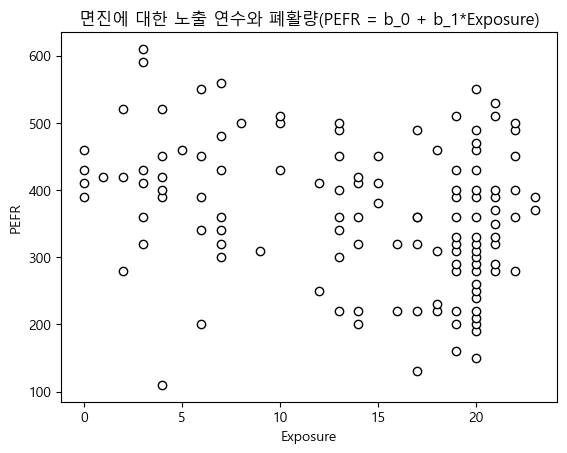

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter( lung["Exposure"], lung["PEFR"],\
     edgecolors='black', facecolors='white') #plt.scatter(X, y)
plt.xlabel("Exposure")
plt.ylabel("PEFR")
plt.title("면진에 대한 노출 연수와 폐활량(PEFR = b_0 + b_1*Exposure)")
plt.show();

- 방법 1 : sm.OLS 이용(R과 같은 결과)

In [6]:
import pandas as pd
import statsmodels.api as sm

# 데이터프레임에서 Exposure와 PEFR 컬럼을 사용하여 선형 회귀 모델 생성
model_ols = sm.OLS.from_formula("PEFR ~ Exposure", data=lung)
result_ols = model_ols.fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Sat, 09 Sep 2023   Prob (F-statistic):            0.00201
Time:                        14:42:30   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.5828     20.796     20.417      0.0

In [7]:
# Exposure에 절편을 추가하지 않고 선형 회귀 모델 생성
model_ols2 = sm.OLS.from_formula("PEFR ~ Exposure - 1", data=lung)
result_ols2 = model_ols2.fit()
print(result_ols2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   PEFR   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              265.6
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                    2.62e-32
Time:                        14:42:30   Log-Likelihood:                         -827.07
No. Observations:                 122   AIC:                                      1656.
Df Residuals:                     121   BIC:                                      1659.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- 방법 2 : sklearn LinearRegression 이용

In [8]:
from sklearn.linear_model import LinearRegression

predictors = ["Exposure"]
outcome = "PEFR"

model_sklearn = LinearRegression()
model_sklearn.fit(lung[predictors], lung[outcome])

print(f"Intercept: {model_sklearn.intercept_:.3f}")
print(f"Coefficient Exposure: {model_sklearn.coef_[0]:.3f}")
print(f" Y = {model_sklearn.coef_[0]:.3f}X + {model_sklearn.intercept_:.3f}")


Intercept: 424.583
Coefficient Exposure: -4.185
 Y = -4.185X + 424.583


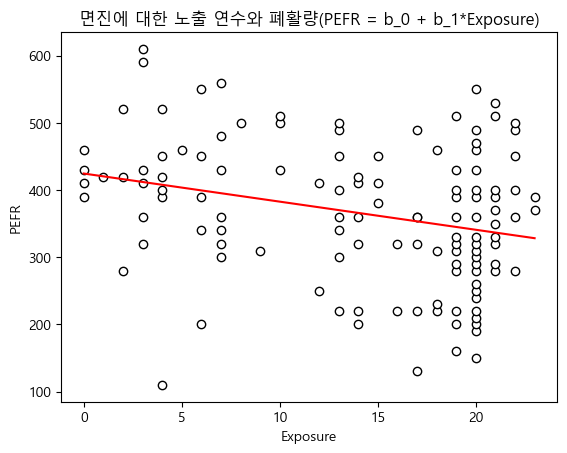

In [9]:
lung["hat_PEFR"] = lung["Exposure"]*model_sklearn.coef_[0] + model_sklearn.intercept_

plt.figure()
plt.scatter( lung["Exposure"], lung["PEFR"],\
     edgecolors='black', facecolors='white') 

# 모델의 회귀선
plt.plot(lung["Exposure"], lung["hat_PEFR"] , c='r')

plt.xlabel("Exposure")
plt.ylabel("PEFR")
plt.title("면진에 대한 노출 연수와 폐활량(PEFR = b_0 + b_1*Exposure)")
plt.show();

### 4.1.2 적합값(예측값)과 잔차(예측 오차)

- 보통 모든 데이터가 정확히 한 직선 안에 들어오지 않기 때문에 명시적으로 오차항을 포함함

- 적합값 (예측값)
$$ 적합값 : \hat{Y}_{i} (Y hat) $$ 
$$ 추정을 통해 얻은 값(불확실한 값 ) :  \hat{b}_{0} , \hat{b}_{1}     $$ 
$$ \hat{Y}_{i} = \hat{b}_{0} + \hat{b}_{1}X_{i}$$

- 잔차
$$ 오차항 : \varepsilon_{i} $$
$$ 잔차 : \hat{ \varepsilon }_{i}  = Y_{i} - \hat{Y}_{i} $$ 
$$ Y_{i} = b_{0} + b_{1}X_{i} + \varepsilon_{i}$$

In [10]:
fitted = model_sklearn.predict(lung[predictors])
residuals = lung[outcome] - fitted

In [11]:
residuals.head()

0   -34.582807
1   -14.582807
2     5.417193
3    35.417193
4    -0.398230
Name: PEFR, dtype: float64

### 4.1.3 최소제곱

- 잔차제곱합(RSS, residual sum of squares) : 잔차들을 제곱한 값들의 합
- 데이터에 적합한 값 = 잔차제곱을 최소화하는 선
- 잔차제곱합을 최소화하는 값을 찾는 기법 : 최조제곱회구 = 보통최소제곱(OLS, ordinary least squares)

## 4.2 다중선형회귀

In [12]:
import pandas as pd

house = pd.read_csv("https://raw.githubusercontent.com/restful3/ds4th_study/main/source/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%86%B5%EA%B3%84/datasets/house_sales.csv",
                    sep = "\t")
house.head()


,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [13]:
subset = ["AdjSalePrice", "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
house_data = house[subset]
house_data.info()
# dbl(double) in R = float  in python

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22687 entries, 1 to 27063
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdjSalePrice   22687 non-null  float64
 1   SqFtTotLiving  22687 non-null  int64  
 2   SqFtLot        22687 non-null  int64  
 3   Bathrooms      22687 non-null  float64
 4   Bedrooms       22687 non-null  int64  
 5   BldgGrade      22687 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


- 방법 1 : sm.OLS 이용(R과 같은 결과)

In [14]:
import pandas as pd
import statsmodels.api as sm

model_multiols = sm.OLS.from_formula("AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade", data=house_data)
result_multiols = model_multiols.fit()
print(result_multiols.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:42:31   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+05   1.57e+04    -33.342

In [15]:
predictors = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
outcome = "AdjSalePrice"

model_multiols2 = sm.OLS(house_data[outcome], house_data[predictors].assign(const=1))
result_multiols2 = model_multiols2.fit()
print(result_multiols2.summary())

#assign 메서드 : 값이 1인 상수열을 예측변수에 추가 => 절편 모델링에 필요함
#assign 메서드로 절편 모델링까지 해야 sm.OLS.from_fomula()로 만든 것과 같은 결과 나옴

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:42:31   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [16]:
import statsmodels.api as sm

model_multiols_cf = sm.OLS(house_data[outcome], house_data[predictors])
result_multiols_cf = model_multiols_cf.fit()
print(result_multiols_cf.summary())


                                 OLS Regression Results                                
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          2.512e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:42:31   Log-Likelihood:                     -3.1571e+05
No. Observations:               22687   AIC:                                  6.314e+05
Df Residuals:                   22682   BIC:                                  6.315e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

- 방법 2 : sklearn LinearRegression 이용

In [17]:
from sklearn.linear_model import LinearRegression

predictors = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
outcome = "AdjSalePrice"

model_multi_skl = LinearRegression()
model_multi_skl.fit(house_data[predictors], house_data[outcome])

print(f"Intercept: {model_multi_skl.intercept_:.3f}")
print(f"Coefficient : ")
for name, coef in zip(predictors, model_multi_skl.coef_ ) :
    print(f"  {name} : {coef}")


Intercept: -521871.368
Coefficient : 
  SqFtTotLiving : 228.83060360240754
  SqFtLot : -0.06046682065306008
  Bathrooms : -19442.840398321146
  Bedrooms : -47769.955185214094
  BldgGrade : 106106.9630789811


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

multi_fitted = model_multi_skl.predict(house[predictors])
multi_RSME = np.sqrt(mean_squared_error(house[outcome], multi_fitted))
multi_r2 = r2_score(house[outcome], multi_fitted)

print(f"RMSE : {multi_RSME:.0f}")
print(f"R2 : {multi_r2:.4f}")

RMSE : 261220
R2 : 0.5406


- 해석 방법 
    - 모든 변수 X_k(단 k ≠ j) 가  고정되었다고 가정했을 때 X_j가 변하는 정도에 따라 예측값 hat(Y)도 계수 b_j에 비례해 변화
    - 예를들어 주택(SqFtTotLiving)에 1제곱피트를 추가하면 예상 가격(AdjSalePrice)이 229달러 증가

### 4.2.2 모형 평가
- RSME와 RSE의 유일한 차이  : 분모
    - RSME의 분모  = 데이터 개수
    - RSE의 분모 = 자유도
- 파이썬에서는 따로 계산해야 함. sm.OLS.from_formula()에 제공되지 않음

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
house_fitted = model_multi_skl.predict(house_data[predictors])
house_RSME = np.sqrt(mean_squared_error(house[outcome], house_fitted))
house_r2 = r2_score(house[outcome], house_fitted)
print(f"RMSE : {house_RSME:.0f}")
print(f"R2 : {house_r2:.4f}")

RMSE : 261220
R2 : 0.5406


### 4.2.4 모형선택 및 단계적 회귀

In [20]:
subset2 = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade", 
           "PropertyType", "NbrLivingUnits", "SqFtFinBasement", "YrBuilt",
           "YrRenovated", "NewConstruction"]
house_X = house[subset2]
outcome = "AdjSalePrice"

In [21]:
house_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22687 entries, 1 to 27063
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SqFtTotLiving    22687 non-null  int64  
 1   SqFtLot          22687 non-null  int64  
 2   Bathrooms        22687 non-null  float64
 3   Bedrooms         22687 non-null  int64  
 4   BldgGrade        22687 non-null  int64  
 5   PropertyType     22687 non-null  object 
 6   NbrLivingUnits   22687 non-null  int64  
 7   SqFtFinBasement  22687 non-null  int64  
 8   YrBuilt          22687 non-null  int64  
 9   YrRenovated      22687 non-null  int64  
 10  NewConstruction  22687 non-null  bool   
dtypes: bool(1), float64(1), int64(8), object(1)
memory usage: 1.9+ MB


In [22]:
#object, bool이 있는 상태에서 학습 => 에러
model = sm.OLS(house[outcome], house_X.assign(const=1))
result = model.fit()
print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and SqFtTotLiving        int64
SqFtLot              int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
PropertyType        object
NbrLivingUnits       int64
SqFtFinBasement      int64
YrBuilt              int64
YrRenovated          int64
NewConstruction       bool
const                int64
dtype: object. The data was
1         300805.0
2        1076162.0
3         761805.0
4         442065.0
5         297065.0
           ...    
27057     443803.0
27058    1586196.0
27061     220744.0
27062     342207.0
27063     475489.0
Name: AdjSalePrice, Length: 22687, dtype: float64
and
        SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
1               2400     9373       3.00         6          7      Multiplex   
2               3764    20156       3.75         4         10  Single Family   
3               2060    26036       1.75         4          8  Single Family   
4               3200     8618       3.75         5          7  Single Family   
5               1720     8620       1.75         4          7  Single Family   
...              ...      ...        ...       ...        ...            ...   
27057           1480     5468       1.75         3          7  Single Family   
27058           4720    23914       4.50         4         11  Single Family   
27061           1070    11170       1.00         4          6  Single Family   
27062           1345     6223       2.00         3          7  Single Family   
27063            790     4400       1.50         3          7  Single Family   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  \
1                   2                0     1991            0            False   
2                   1             1452     2005            0             True   
3                   1              900     1947            0            False   
4                   1             1640     1966            0            False   
5                   1                0     1948            0            False   
...               ...              ...      ...          ...              ...   
27057               1              590     1951            0            False   
27058               1              910     2000            0            False   
27061               1                0     1971            0            False   
27062               1                0     1939            0            False   
27063               1                0     1928            0            False   

       const  
1          1  
2          1  
3          1  
4          1  
5          1  
...      ...  
27057      1  
27058      1  
27061      1  
27062      1  
27063      1  

[22687 rows x 12 columns]
before. After,
[ 300805. 1076162.  761805. ...  220744.  342207.  475489.]
[[2400 9373 3.0 ... 0 False 1]
 [3764 20156 3.75 ... 0 True 1]
 [2060 26036 1.75 ... 0 False 1]
 ...
 [1070 11170 1.0 ... 0 False 1]
 [1345 6223 2.0 ... 0 False 1]
 [790 4400 1.5 ... 0 False 1]].

In [27]:
house_X_dummy = pd.get_dummies(house_X, drop_first=True)
house_X_dummy["NewConstruction"] = [1 if nc else 0 for nc in house_X_dummy["NewConstruction"] ]

house_X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22687 entries, 1 to 27063
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SqFtTotLiving               22687 non-null  int64  
 1   SqFtLot                     22687 non-null  int64  
 2   Bathrooms                   22687 non-null  float64
 3   Bedrooms                    22687 non-null  int64  
 4   BldgGrade                   22687 non-null  int64  
 5   NbrLivingUnits              22687 non-null  int64  
 6   SqFtFinBasement             22687 non-null  int64  
 7   YrBuilt                     22687 non-null  int64  
 8   YrRenovated                 22687 non-null  int64  
 9   NewConstruction             22687 non-null  int64  
 10  PropertyType_Single Family  22687 non-null  uint8  
 11  PropertyType_Townhouse      22687 non-null  uint8  
dtypes: float64(1), int64(9), uint8(2)
memory usage: 1.9 MB


In [28]:
model = sm.OLS(house[outcome], house_X_dummy.assign(const=1))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:43:34   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

- 오컴의 면도날
    - 모든 것이 동일한 조건에서는, 복잡한 모델보다 단순한 모델을 우선 사용

### 단계적 회귀

##### (1) dmba 라이브러리 이용하기

In [24]:
!pip install dmba

##### 1) stepwise_selection

In [29]:
from dmba import stepwise_selection, AIC_score

X = house_X_dummy
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) ==0 :
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model,
                                                score_model, verbose=True)
print("\n[Results]")
print(f"Intercept {best_model.intercept_:.3f}")
print("Coefficients: ")
for name, coef in zip(best_variables, best_model.coef_):
    print(f" {name} : {coef} ")


Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

[Results]
Intercept 6178645.017
Coefficients: 
 SqFtTotLiving : 199.2775530420158 
 BldgGrade : 137159.5602261976 
 YrBuilt : -3565.424939249463 
 Bedrooms : -51947.38367361413 
 Bathrooms : 42396.16452772056 
 PropertyType_Townhouse : 84479.16203299937 
 SqFtFinBasement : 7.046974967583083 
 PropertyType_Single Family : 22912.05518701767 


##### 2) forward_selection

In [30]:
from dmba import forward_selection, backward_elimination, AIC_score

X = house_X_dummy
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) ==0 :
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = forward_selection(X.columns, train_model,
                                                score_model, verbose=True)
print("\n[Results]")
print(f"Intercept {best_model.intercept_:.3f}")
print("Coefficients: ")
for name, coef in zip(best_variables, best_model.coef_):
    print(f" {name} : {coef} ")


Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, add None

[Results]
Intercept 6178645.017
Coefficients: 
 SqFtTotLiving : 199.2775530420158 
 BldgGrade : 137159.5602261976 
 YrBuilt : -3565.424939249463 
 Bedrooms : -51947.38367361413 
 Bathrooms : 42396.16452772056 
 PropertyType_Townhouse : 84479.16203299937 
 SqFtFinBasement : 7.046974967583083 
 PropertyType_Single Family : 22912.05518701767 


##### 3) backward_elimination

In [31]:
from dmba import backward_elimination, AIC_score

X = house_X_dummy
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) ==0 :
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = backward_elimination(X.columns, train_model,
                                                score_model, verbose=True)
print("\n[Results]")
print(f"Intercept {best_model.intercept_:.3f}")
print("Coefficients: ")
for name, coef in zip(best_variables, best_model.coef_):
    print(f" {name} : {coef} ")


Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=627530.36
Step: score=627528.47, remove NbrLivingUnits
Step: score=627526.65, remove NewConstruction
Step: score=627525.08, remove YrRenovated
Step: score=627524.98, remove SqFtLot
Step: score=627524.98, remove None

[Results]
Intercept 6178645.017
Coefficients: 
 SqFtTotLiving : 199.2775530420138 
 Bathrooms : 42396.16452771995 
 Bedrooms : -51947.383673613476 
 BldgGrade : 137159.560226197 
 SqFtFinBasement : 7.046974967561255 
 YrBuilt : -3565.4249392494003 
 PropertyType_Single Family : 22912.05518701774 
 PropertyType_Townhouse : 84479.16203299782 


#### (2) 직접 작성하기 (우석님 도움 감사합니다 ^^*)

##### 1) 변수선택법

In [32]:
import time
import itertools

#변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수
def getBest(X,y,k):
    tic = time.time() # 시작 시간
    results = [] # 결과 저장 공간
    
    # 각 변수 조합을 고려한 경우의수
    for combo in itertools.combinations(X.columns,k):
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
                              
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time() # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    return best_model

getBest(X=X, y=y, k=2)

Processed 66 models on 2 predictors in 0.12000155448913574 seconds.


model    <statsmodels.regression.linear_model.Regressio...
AIC                                          632462.939946
Name: 2, dtype: object

##### 2) 전진선택법

In [33]:
def forward(X,y,predictors):
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]))

    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    
    toc = time.time()
    # print(best_model)
    print(f"Processed {models.shape[0]}, models on {len(predictors)+1},predictors in{(toc-tic):.3f}")
    print(f"Selected predictors: {best_model['model'].model.exog_names} \nAIC: {best_model[1]:.3f}")
    print()
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []

    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X , y=y, predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")

    return (Fmodels['model'][len(Fmodels['model'])])

In [35]:
Forward_best_model = forward_model(X=X, y=y)
Forward_best_model.aic

Processed 12, models on 1,predictors in0.021
Selected predictors: ['SqFtTotLiving'] 
AIC: 633104.575

Processed 11, models on 2,predictors in0.022
Selected predictors: ['SqFtTotLiving', 'Bedrooms'] 
AIC: 632462.940

Processed 10, models on 3,predictors in0.028
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade'] 
AIC: 631447.465

Processed 9, models on 4,predictors in0.030
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'YrBuilt'] 
AIC: 629926.036

Processed 8, models on 5,predictors in0.033
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'SqFtFinBasement'] 
AIC: 629539.330

Processed 7, models on 6,predictors in0.043
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'SqFtFinBasement', 'YrRenovated'] 
AIC: 629372.560

Processed 6, models on 7,predictors in0.039
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'SqFtFinBasement', 'YrRenovated', 'NewConstruction'] 
AIC: 629252.307

Pro

629064.2012919211

In [36]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          1.420e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:43:56   Log-Likelihood:                     -3.1452e+05
No. Observations:               22687   AIC:                                  6.291e+05
Df Residuals:                   22677   BIC:                                  6.291e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                179.7514      3.837     46.841      0.000     172.230     187.273
Bedrooms                   -5.101e+04   2420.704    -21.073      0.000   -5.58e+04   -4.63e+04
BldgGrade                   1.368e+05   2515.119     54.403      0.000    1.32e+05    1.42e+05
YrBuilt                     -623.3345     22.823    -27.312      0.000    -668.069    -578.600
SqFtFinBasement               70.6415      4.486     15.746      0.000      61.848      79.435
YrRenovated                   42.8765      3.876     11.061      0.000      35.279      50.474
NewConstruction            -5.212e+04   5965.939     -8.737      0.000   -6.38e+04   -4.04e+04
NbrLivingUnits              2.374e+05   1.71e+04     13.847      0.000    2.04e+05    2.71e+05
PropertyType_Single Family  2.825e+05   2.61e+04     10.812      0.000    2.31e+05    3.34e+05
PropertyType_Townhouse      2.736e+05   2.75e+04      9.935      0.000     2.2e+05    3.28e+05
==============================================================================
Omnibus:                    29816.595   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20331446.936
Skew:                           6.938   Prob(JB):                         0.00
Kurtosis:                     148.998   Cond. No.                     7.05e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### (3) 후진제거법

In [37]:
def backward(X,y,predictors):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print(f"Processed {models.shape[0]} models on {len(predictors) - 1} predictors in {(toc-tic):.3f}")
    print(f'Selected predictors: {best_model["model"].model.exog_names} \n AIC: {best_model[1]:.3f}')
    print()
    
    return best_model

def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=X, y= y,predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before : break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors ]

    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return Bmodels["model"].dropna().iloc[0]

In [38]:
Backward_best_model = backward_model(X=X, y= y)

Processed 12 models on 11 predictors in 0.115
Selected predictors: ['SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 'NewConstruction', 'PropertyType_Single Family', 'PropertyType_Townhouse'] 
 AIC: 629064.424

Processed 11 models on 10 predictors in 0.090
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 'NewConstruction', 'PropertyType_Single Family', 'PropertyType_Townhouse'] 
 AIC: 629064.201

Processed 10 models on 9 predictors in 0.087
Selected predictors: ['SqFtTotLiving', 'Bedrooms', 'BldgGrade', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 'PropertyType_Single Family', 'PropertyType_Townhouse'] 
 AIC: 629138.439

Total elapsed time: 0.3149850368499756 seconds.


In [39]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          1.420e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:44:01   Log-Likelihood:                     -3.1452e+05
No. Observations:               22687   AIC:                                  6.291e+05
Df Residuals:                   22677   BIC:                                  6.291e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                179.7514      3.837     46.841      0.000     172.230     187.273
Bedrooms                   -5.101e+04   2420.704    -21.073      0.000   -5.58e+04   -4.63e+04
BldgGrade                   1.368e+05   2515.119     54.403      0.000    1.32e+05    1.42e+05
NbrLivingUnits              2.374e+05   1.71e+04     13.847      0.000    2.04e+05    2.71e+05
SqFtFinBasement               70.6415      4.486     15.746      0.000      61.848      79.435
YrBuilt                     -623.3345     22.823    -27.312      0.000    -668.069    -578.600
YrRenovated                   42.8765      3.876     11.061      0.000      35.279      50.474
NewConstruction            -5.212e+04   5965.939     -8.737      0.000   -6.38e+04   -4.04e+04
PropertyType_Single Family  2.825e+05   2.61e+04     10.812      0.000    2.31e+05    3.34e+05
PropertyType_Townhouse      2.736e+05   2.75e+04      9.935      0.000     2.2e+05    3.28e+05
==============================================================================
Omnibus:                    29816.595   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20331446.936
Skew:                           6.938   Prob(JB):                         0.00
Kurtosis:                     148.998   Cond. No.                     7.05e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2.5 가중회귀

* 가중회귀의 유용성
    - 서로 다른 관측치를 다른 정밀도로 측정했을 때, 역분산 가중치를 얻을 수 있다. 분산이 높을수록 가중치가 낮음
    - 가중치 변수가 집계된 데이터의 각 행이 나타내는 원본 관측치의 수를 인코딩하도록, 행이 여러 경우를 의미하는 데이터를 분석할 수 있음

In [40]:
import pandas as pd

house = pd.read_csv("https://raw.githubusercontent.com/restful3/ds4th_study/main/source/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%86%B5%EA%B3%84/datasets/house_sales.csv",
                    sep = "\t")
house.head()


,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


* 상황
    - 주택 가격 데이터의 경우, 오래된 매매 정보일수록 최근 정보보다는 신뢰하기 어려움
    - 2005년(데이터 수집을 시작한) 이래 지난 연수를 가중치로 사용하기

In [41]:
house["Year"] = [int(date.split("-")[0]) for date in house.DocumentDate]
house["Weight"] = house.Year - 2005

house[["Year", "Weight"]].head()

,Year,Weight
1,2014,9
2,2006,1
3,2007,2
4,2008,3
5,2013,8


In [42]:
from sklearn.linear_model import LinearRegression

predictors = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
outcome = "AdjSalePrice"

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], \
             sample_weight = house.Weight)

print(f"Intercept: {house_wt.intercept_:.3f}")
print(f"Coefficient : ")
for name, coef in zip(predictors, house_wt.coef_ ) :
    print(f"  {name} : {coef}")


Intercept: -584189.329
Coefficient : 
  SqFtTotLiving : 245.02408862720154
  SqFtLot : -0.292414748005573
  Bathrooms : -26085.970108615093
  Bedrooms : -53608.87643631376
  BldgGrade : 115242.43472609257


In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

wt_fitted = house_wt.predict(house[predictors])
wt_RSME = np.sqrt(mean_squared_error(house[outcome], wt_fitted))
wt_r2 = r2_score(house[outcome], wt_fitted)

print(f"RMSE : {wt_RSME:.0f}")
print(f"R2 : {wt_r2:.4f}")

# 다중선형회귀 sklearn로 측정한 결과
# RMSE : 261220
# R2 : 0.5406

RMSE : 261908
R2 : 0.5382


## 4.3 회귀를 이용한 예측
- 데이터과학에서 회귀의 주된 목적 : 예측
- 전통 통계학에서 회귀의 주된 목적 : 설명을 위한 모델링

## 4.4 회귀에서의 요인변수

### 4.4.1 가변수 표현

In [44]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22687 entries, 1 to 27063
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise

In [45]:
house["PropertyType"].unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

In [46]:
#1 기본적으로 범주형 변수의 원핫 인코딩 반환
pd.get_dummies(house["PropertyType"]).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [47]:
#2. p-1개의 열 반환, 다중공선성 문제 피할 때 사용
pd.get_dummies(house["PropertyType"], drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [48]:
from sklearn.linear_model import LinearRegression

predictors = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
outcome = "AdjSalePrice"

X_dummy = pd.get_dummies(house[predictors], drop_first = True)

dummy_lm = LinearRegression()
dummy_lm.fit(X_dummy, house[outcome])

print(f"Intercept: {dummy_lm.intercept_:.3f}")
print(f"Coefficient : ")
for name, coef in zip(predictors, dummy_lm.coef_ ) :
    print(f"  {name} : {coef}")


Intercept: -521871.368
Coefficient : 
  SqFtTotLiving : 228.83060360240754
  SqFtLot : -0.06046682065306008
  Bathrooms : -19442.840398321146
  Bedrooms : -47769.955185214094
  BldgGrade : 106106.9630789811


In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

dummy_fitted = dummy_lm.predict(X_dummy)
dummy_RSME = np.sqrt(mean_squared_error(house[outcome], dummy_fitted))
dummy_r2 = r2_score(house[outcome], dummy_fitted)

print(f"RMSE : {dummy_RSME:.0f}")
print(f"R2 : {dummy_r2:.4f}")

# 다중선형회귀 sklearn로 측정한 결과
# RMSE : 261220
# R2 : 0.5406

RMSE : 261220
R2 : 0.5406


### 4.4.2 다수의 수준을 갖는 요인변수들
- 경우의 수가 많아서 이진더미 생성이 어려운 경우

In [50]:
pd.DataFrame(house["ZipCode"].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [51]:
pd.DataFrame(house["ZipCode"].value_counts()).T

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


- ZipCode는 주택 가격에 대한 위치 효과를 볼 수 있는 중요한 변수
- 몇몇 번호에는 매물이 하나뿐
- 지역을 나타내는 처음 두, 세자리로 묶을 경우 특정 지역에서만 판매가 많이 이루어지기 때문에 정보 손실
- 해결방법 : 다른 변수(매매 가격 등)을 이용하여 우편번호 그룹 만들기

In [52]:
# 회귀 결과의 잔차값의 중간값을 기준으로 5개 그룹으로 통합하기
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        "ZipCode" : house["ZipCode"],
        "residual" : house[outcome] - model_multi_skl.predict(house[predictors]),
    })
    .groupby(["ZipCode"])
    .apply(lambda x:{
        "ZipCode" : x.iloc[0,0],
        "count" : len(x),
        "median_residual" : x.residual.median()
    })
]).sort_values("median_residual")

zip_groups.head()

,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593


In [53]:
zip_groups["cum_count"] = np.cumsum(zip_groups["count"])
zip_groups.head()

,ZipCode,count,median_residual,cum_count
36,98057,4,-537321.644462,4
27,98043,1,-307661.343614,5
46,98092,289,-193569.183599,294
23,98038,788,-150066.477035,1082
31,98051,32,-142352.869593,1114


In [54]:
zip_groups["ZipGroup"] = pd.qcut(zip_groups["cum_count"], 5, labels=False, retbins=False)
zip_groups.head()

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0


In [55]:
to_join = zip_groups[["ZipCode", "ZipGroup"]].set_index("ZipCode")
to_join.head()

,ZipGroup
ZipCode,
98057,0
98043,0
98092,0
98038,0
98051,0


In [56]:
house = house.join(to_join, on="ZipCode")
house["ZipGroup"] = house["ZipGroup"].astype("category")
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Year,Weight,ZipGroup
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,1991,0,0,70000,229000,98002,False,2014,9,2
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,2005,0,0,203000,590000,98166,True,2006,1,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1947,0,0,183000,275000,98166,False,2007,2,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,1966,0,0,104000,229000,98168,False,2008,3,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1948,0,0,104000,205000,98168,False,2013,8,2


## 4.5 회귀방정식 해석

### 4.5.1 예측변수간 상관

In [57]:
from sklearn.linear_model import LinearRegression

predictors_cf = [ "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade", 
              "ZipGroup"]
outcome = "AdjSalePrice"

X_confound = pd.get_dummies(house[predictors], drop_first = True)

confounding_lm = LinearRegression()
confounding_lm.fit(X_confound, house[outcome])

print(f"Intercept: {confounding_lm.intercept_:.3f}")
print(f"Coefficient : ")
for name, coef in zip(predictors, confounding_lm.coef_ ) :
    print(f"  {name} : {coef}")


Intercept: -521871.368
Coefficient : 
  SqFtTotLiving : 228.83060360240754
  SqFtLot : -0.06046682065306008
  Bathrooms : -19442.840398321146
  Bedrooms : -47769.955185214094
  BldgGrade : 106106.9630789811


### 4.5.3 교란변수
- 변수 상관 : 응답변수와 비슷한 예측 관계를 가즌ㄴ 다른 변수가 포함되는 바람에 비롯된 문제
- 교란 변수 : 회귀방정식에 중요한 변수가 포함되지 못해서 생기는 누락의 문제

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

cf_fitted = confounding_lm.predict(house[predictors])
cf_RSME = np.sqrt(mean_squared_error(house[outcome], cf_fitted))
cf_r2 = r2_score(house[outcome], cf_fitted)

print(f"RMSE : {cf_RSME:.0f}")
print(f"R2 : {cf_r2:.4f}")

# 다중선형회귀 sklearn로 측정한 결과
# RMSE : 261220
# R2 : 0.5406

RMSE : 261220
R2 : 0.5406


### 4.5.4 상호작용과 주효과

In [59]:
import pandas as pd
import statsmodels.api as sm

model_coe = sm.OLS.from_formula("AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType",\
                                      data=house)
result_coe = model_coe.fit()
print(result_coe.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:44:22   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## 4.6 회귀진단

### 4.6.1 특이값(이상치)

In [60]:
house_98105 = house.loc[house["ZipCode"]==98105, ]
predictors = ["SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]
outcome = "AdjSalePrice"

house_outlier = sm.OLS(house_98105[outcome],house_98105[predictors].assign(const=1) )
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.69e-103
Time:                        14:44:24   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

In [61]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal # 내부적으로 표준화 잔차(=잔차/표준오차) 계산
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078558)

In [62]:
#특이값에 해당되는 레코드들
outlier = house_98105.loc[sresiduals.idxmin(), :]
print("AdjSalePrice", outlier[outcome])
print(outlier[predictors])
# 이 우편번호에 해당하는 지역에서 이 평수라면  더 비싸야 정상
# 법정 담보가 잡혀있는 특잇값

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### 4.6.2 영향값
- 주영향관측값(influential observation) : 회귀모형에서 제외됐을 때 모델에 중요한 변화를 가져오는 값
- 레버리지(Leverage) : 데이터가 회귀 모델에 미치는 영향 정도
- 영향력 판단 지표
    1) hat-value : 2(P+1)/n 이상의 값들은 레버리지가 높은 데이터(=특잇값)라고 판단
    2) cook's distance : 레버리지와 잔차의 크기를 합쳐서 영향력을 판단

In [63]:
np.array(influence.cooks_distance).shape

(2, 313)

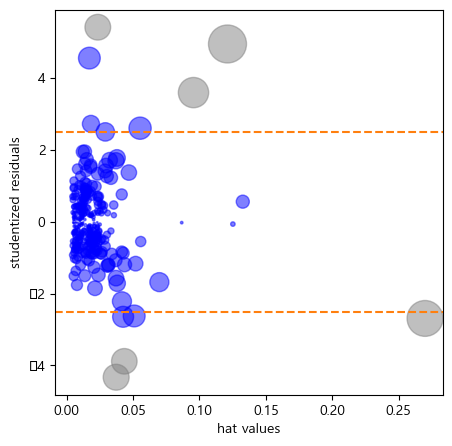

In [64]:
import matplotlib.pyplot as plt

influence = OLSInfluence(result_98105)


outlier_indices = np.where(influence.cooks_distance[0] >= 0.08)[0]
highlight_mask = np.zeros_like(influence.cooks_distance[0], dtype=bool)
highlight_mask[outlier_indices] = True


fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(-2.5, linestyle="--", color = "C1")
ax.axhline(2.5, linestyle="--", color = "C1")
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000*np.sqrt(influence.cooks_distance[0]), 
           c=np.where(highlight_mask, "gray", "blue"),# 쿡의 거리가 0.08 이상이면 회색으로 강조표시
            alpha= 0.5)
ax.set_xlabel("hat values")
ax.set_ylabel("studentized residuals")
plt.show();

### 4.6.3 이분산성, 비정규성, 오차 간 상관

In [65]:
regplot_data = pd.DataFrame((result_98105.fittedvalues, result_98105.resid)).T.reset_index()
regplot_data.columns = ["index","fitted", "resid"]
regplot_data.head()

,index,fitted,resid
0,1036,1.282201e+06,-456062.232432
1,1769,8.314002e+05,-158145.203415
2,1770,7.188563e+05,-62978.327751
3,1771,8.305480e+05,-186794.017568
4,1783,1.445666e+06,-99686.534518


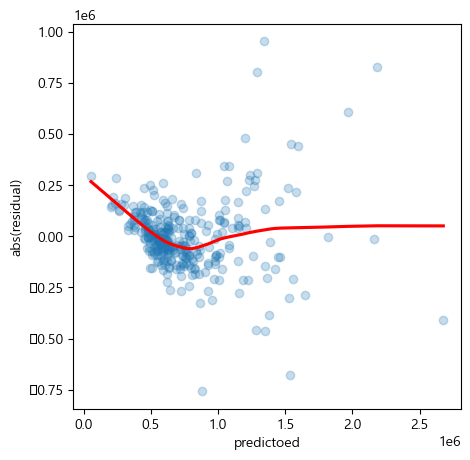

In [66]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data = regplot_data, x = "fitted", y = "resid", 
            scatter_kws = {"alpha": 0.25}, line_kws = {"color":"r"},
            lowess=True, #데이터 평활화(smoothing) True : 일련의 구간별 회귀 모형을 추정한 후 부드럽게 나타내어 분산과 잔차의 상관성 확인
            ax = ax)
ax.set_xlabel("predictoed")
ax.set_ylabel("abs(residual)")
plt.show();

#잔차 분산은 고가이거나 완전 저가인 주택일수록 증가하는 경향
#분산이 고르지 않으므로 등분산가정 위배 = 이분산성 오차 가짐

### 4.6.4 편잔차그림과 비선형성
- 편잔차그림 : 예측 모델이 예측변수와 결과 변수 간의 관계를 얼마나 잘 설명하는지 시각화하는 방법
- 예측변수X_i의 편잔차 = 일반잔차에 X_i와 관련된 회귀항을 더한 값
    * 편잔차 =  잔차 + hat{b_i}* X_i
    * hat{b_i} : 회귀계수 추정치

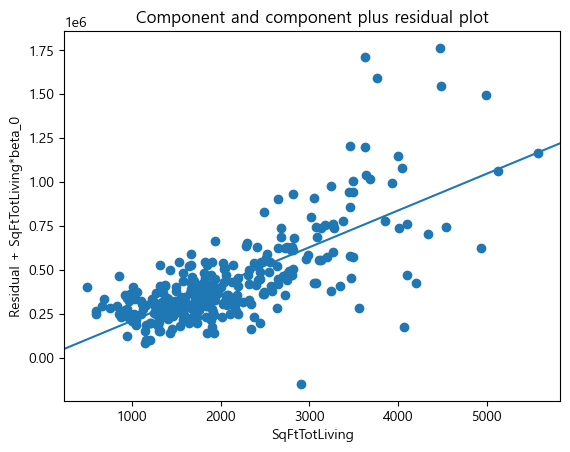

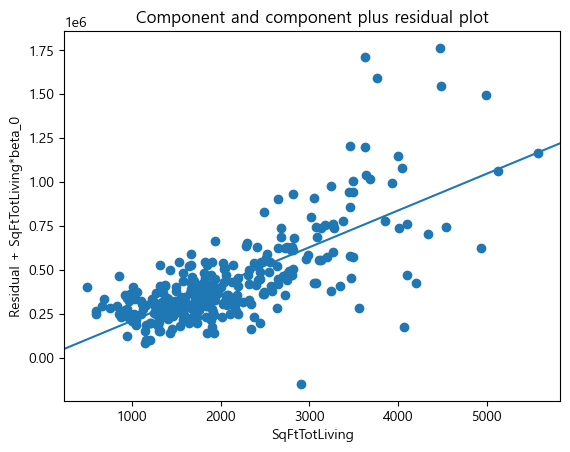

In [67]:
sm.graphics.plot_ccpr(result_98105, "SqFtTotLiving")
# 

## 4.7 다항회귀

### 4.7.1 다항식

In [68]:
import statsmodels.api as sm

model_poly = sm.OLS.from_formula("AdjSalePrice ~ SqFtTotLiving +" + 
                                 "I(SqFtTotLiving**2) + SqFtLot +" +
                                 "Bathrooms + Bedrooms + BldgGrade" ,\
                                      data=house_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          9.95e-106
Time:                        14:44:33   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+

### 4.7.2 스플라인
- 스플라인 : 고정된 점들 사이를 부드럽게 보간하는 방법
- bs(base spline)

In [69]:
import statsmodels.api as sm

model_spline = sm.OLS.from_formula("AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) +" + #3차 스플라인, df -degree=3개의 내부매듭 생성
                                 "I(SqFtTotLiving**2) + SqFtLot +" +
                                 "Bathrooms + Bedrooms + BldgGrade" ,\
                                      data=house_98105)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          7.10e-104
Time:                        14:44:37   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### 4.7.3 일반화가법모형(GAM)
- 스플라인 회귀를 자동으로 찾는 모형

##### 1) statsmodels

In [71]:
import statsmodels.api as sm

house_98105_X = house_98105[["SqFtTotLiving", "SqFtTotLiving", "SqFtLot", "Bathrooms","Bedrooms","BldgGrade"]]

model_sm_gam = sm.GLM(house_98105["AdjSalePrice"], sm.add_constant(house_98105_X), family=sm.families.Gaussian())
result_sm_gam = model_sm_gam.fit()
print(result_sm_gam.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                            GLM   Df Residuals:                      307
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      3.1860e+10
Method:                          IRLS   Log-Likelihood:                -4226.0
Date:                Sat, 09 Sep 2023   Deviance:                   9.7811e+12
Time:                        14:44:42   Pearson chi2:                 9.78e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9779
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.725e+05   9.83e+04     -7.861

##### 2) pyGAM

In [73]:
!pip install FuzzyTM 
#gensim 4.3.0 requires 

In [74]:
!pip install pygam --user

In [84]:
import pygam

model_pygam = pygam.GAM()
result_pygam = model_pygam.fit(house_98105_X, house_98105["AdjSalePrice"])
print(result_pygam.summary())

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     38.7966
Link Function:                     IdentityLink Log Likelihood:                                 -7684.9886
Number of Samples:                          313 AIC:                                            15449.5705
                                                AICc:                                           15461.4996
                                                GCV:                                      23554763452.6921
                                                Scale:                                    18365520199.7992
                                                Pseudo R-Squared:                                   0.8947
Feature Function                  Lam